<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Speech-Processing-Recognition-/blob/main/2348505_Lab0(SPR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Generate and plot the following signals.
*   A unit step function
*   A unit impulse function
*   A ramp function
*   An exponential signal (decaying and growing)
*   A sinusoidal signal

Write Python code to generate and plot each signal using matplotlib and
numpy.

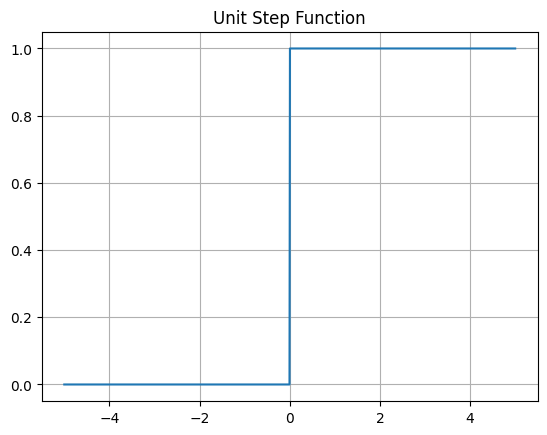

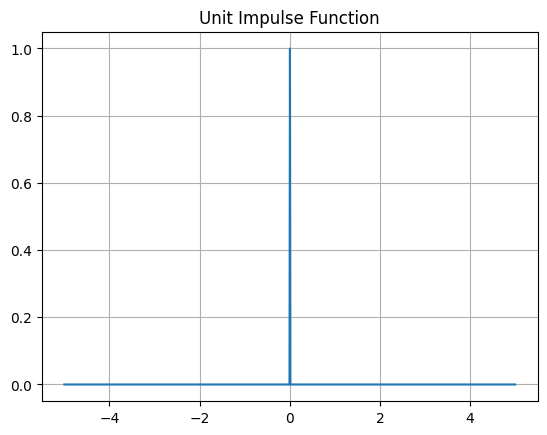

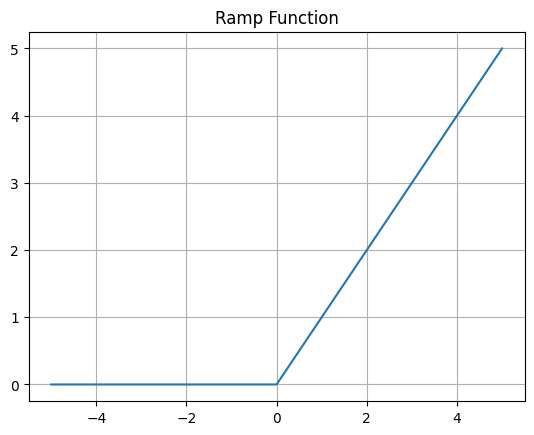

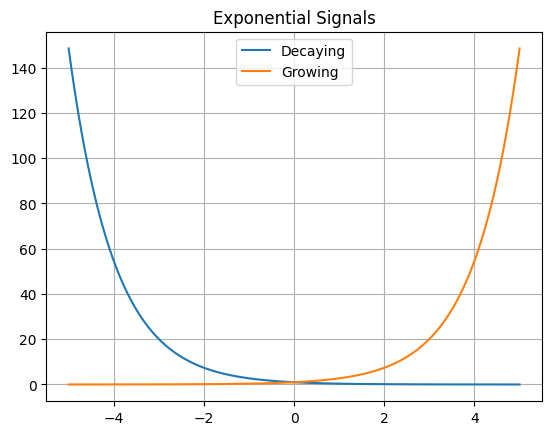

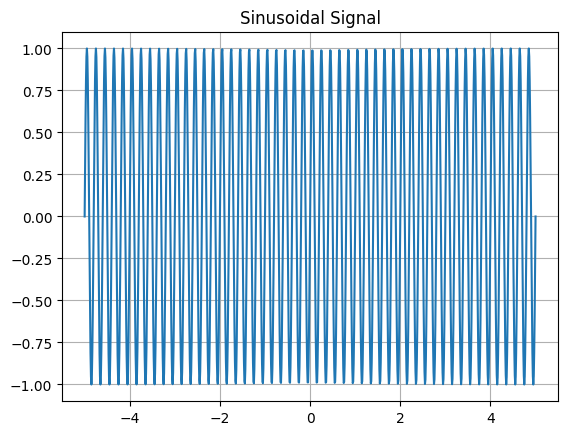

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Unit Step Function
t = np.linspace(-5, 5, 1000)
unit_step = np.heaviside(t, 1)

plt.figure()
plt.plot(t, unit_step)
plt.title('Unit Step Function')
plt.grid(True)
plt.show()

# (b) Unit Impulse Function
impulse = np.zeros(1000)
impulse[500] = 1  # impulse at t=0

plt.figure()
plt.plot(t, impulse)
plt.title('Unit Impulse Function')
plt.grid(True)
plt.show()

# (c) Ramp Function
ramp = np.maximum(0, t)

plt.figure()
plt.plot(t, ramp)
plt.title('Ramp Function')
plt.grid(True)
plt.show()

# (d) Exponential Signal (decaying and growing)
exp_decaying = np.exp(-t)
exp_growing = np.exp(t)

plt.figure()
plt.plot(t, exp_decaying, label='Decaying')
plt.plot(t, exp_growing, label='Growing')
plt.title('Exponential Signals')
plt.legend()
plt.grid(True)
plt.show()

# (e) Sinusoidal Signal
freq = 5  # frequency in Hz
sinusoidal = np.sin(2 * np.pi * freq * t)

plt.figure()
plt.plot(t, sinusoidal)
plt.title('Sinusoidal Signal')
plt.grid(True)
plt.show()

2. You are asked to visualize the effects of sampling and reconstructing a continuous-time signal.

*   Generate a continuous sinusoidal signal.
*   Sample the signal at different rates (Nyquist rate, above, and below
Nyquist).
*   Reconstruct the sampled signal and observe the aliasing effect when undersampled.
*   Plot the continuous signal, sampled points, and the reconstructed signal.

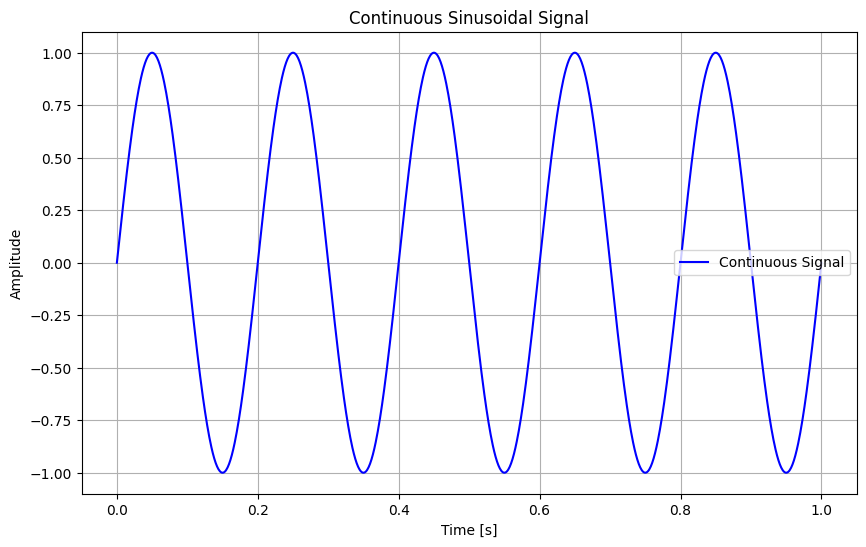

<ipython-input-7-62fa97b21af6>:46: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_nyquist, signal_nyquist, label='Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')


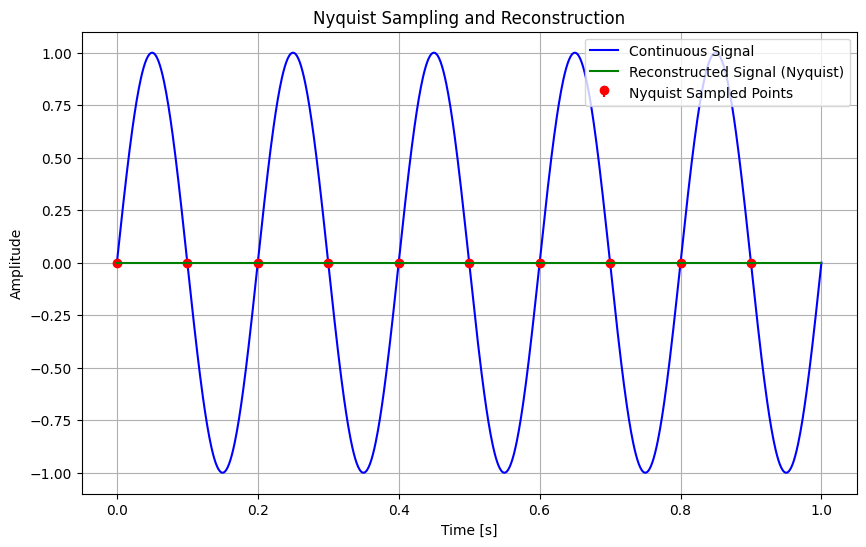

<ipython-input-7-62fa97b21af6>:58: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_above, signal_above, label='Above Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')


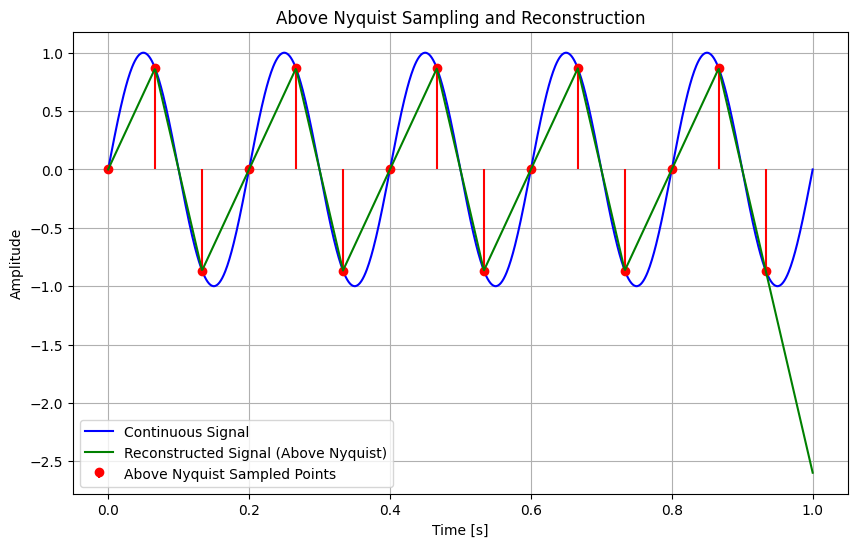

<ipython-input-7-62fa97b21af6>:70: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_below, signal_below, label='Below Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')


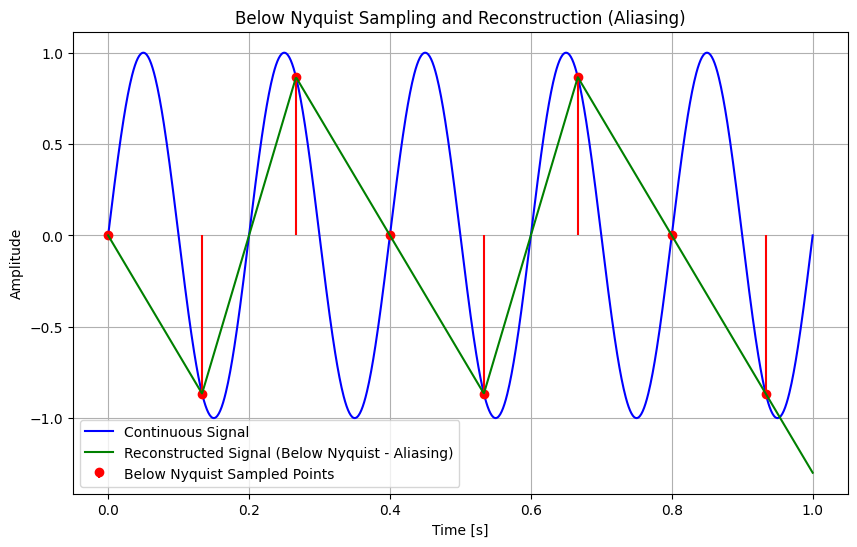

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Parameters
frequency = 5  # Hz
duration = 1  # second
t_cont = np.linspace(0, duration, 1000)  # Continuous time axis
signal_cont = np.sin(2 * np.pi * frequency * t_cont)  # Continuous sinusoidal signal

# Sampling frequencies
fs_nyquist = 2 * frequency  # Nyquist rate
fs_above = 3 * frequency  # Above Nyquist
fs_below = 1.5 * frequency  # Below Nyquist (for aliasing)

# Sampling at Nyquist rate
t_nyquist = np.arange(0, duration, 1/fs_nyquist)
signal_nyquist = np.sin(2 * np.pi * frequency * t_nyquist)

# Sampling above Nyquist rate
t_above = np.arange(0, duration, 1/fs_above)
signal_above = np.sin(2 * np.pi * frequency * t_above)

# Sampling below Nyquist rate (aliasing)
t_below = np.arange(0, duration, 1/fs_below)
signal_below = np.sin(2 * np.pi * frequency * t_below)

# Reconstructing signals using interpolation
reconstructed_nyquist = interp1d(t_nyquist, signal_nyquist, kind='linear', fill_value="extrapolate")(t_cont)
reconstructed_above = interp1d(t_above, signal_above, kind='linear', fill_value="extrapolate")(t_cont)
reconstructed_below = interp1d(t_below, signal_below, kind='linear', fill_value="extrapolate")(t_cont)

# Plotting the continuous signal
plt.figure(figsize=(10, 6))
plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue')
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the Nyquist sampled signal and its reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue')
plt.stem(t_nyquist, signal_nyquist, label='Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')
plt.plot(t_cont, reconstructed_nyquist, label='Reconstructed Signal (Nyquist)', color='green')
plt.title('Nyquist Sampling and Reconstruction')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the above-Nyquist sampled signal and its reconstruction
plt.figure(figsize=(10, 6))
plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue')
plt.stem(t_above, signal_above, label='Above Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')
plt.plot(t_cont, reconstructed_above, label='Reconstructed Signal (Above Nyquist)', color='green')
plt.title('Above Nyquist Sampling and Reconstruction')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the below-Nyquist sampled signal and its reconstruction (aliasing)
plt.figure(figsize=(10, 6))
plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue')
plt.stem(t_below, signal_below, label='Below Nyquist Sampled Points', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')
plt.plot(t_cont, reconstructed_below, label='Reconstructed Signal (Below Nyquist - Aliasing)', color='green')
plt.title('Below Nyquist Sampling and Reconstruction (Aliasing)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

3. Generate and plot a sinusoidal signal with amplitude = 1, frequency = 5 Hz,
and duration = 1 second. Plot both the continuous and discrete versions of
the signal.

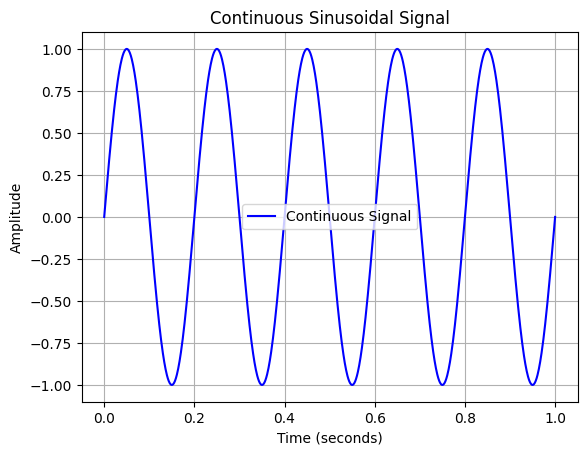

<ipython-input-6-bf23bbe4e1b0>:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_disc, signal_disc, label='Discrete Signal', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')


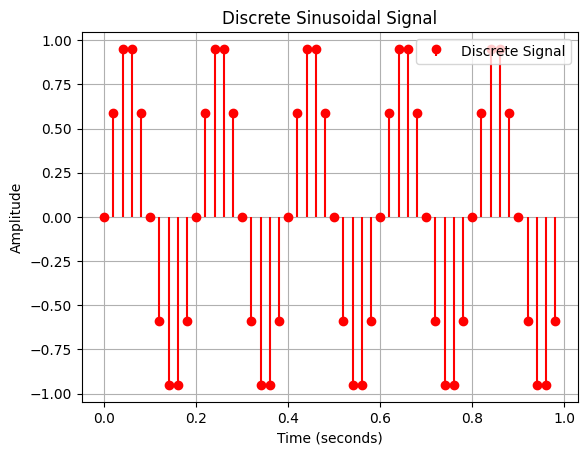

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
amplitude = 1
frequency = 5  # Hz
duration = 1  # second

# Continuous signal
t_cont = np.linspace(0, duration, 1000)
signal_cont = amplitude * np.sin(2 * np.pi * frequency * t_cont)

# Discrete signal
fs = 50  # sampling frequency (e.g., 50 Hz)
t_disc = np.arange(0, duration, 1/fs)
signal_disc = amplitude * np.sin(2 * np.pi * frequency * t_disc)

# Plot continuous signal
plt.figure()
plt.plot(t_cont, signal_cont, label='Continuous Signal', color='blue')
plt.title('Continuous Sinusoidal Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Plot discrete signal
plt.figure()
plt.stem(t_disc, signal_disc, label='Discrete Signal', basefmt=" ", use_line_collection=True, markerfmt='ro', linefmt='r-')
plt.title('Discrete Sinusoidal Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

4. Write a Python program to demonstrate the effects of time shifting and time
scaling on a signal.


*   Generate a unit step function
*   Perform time shifting (delaying or advancing the signal)
*   Perform time scaling (compressing or expanding the signal).
*    Plot the original and transformed signals

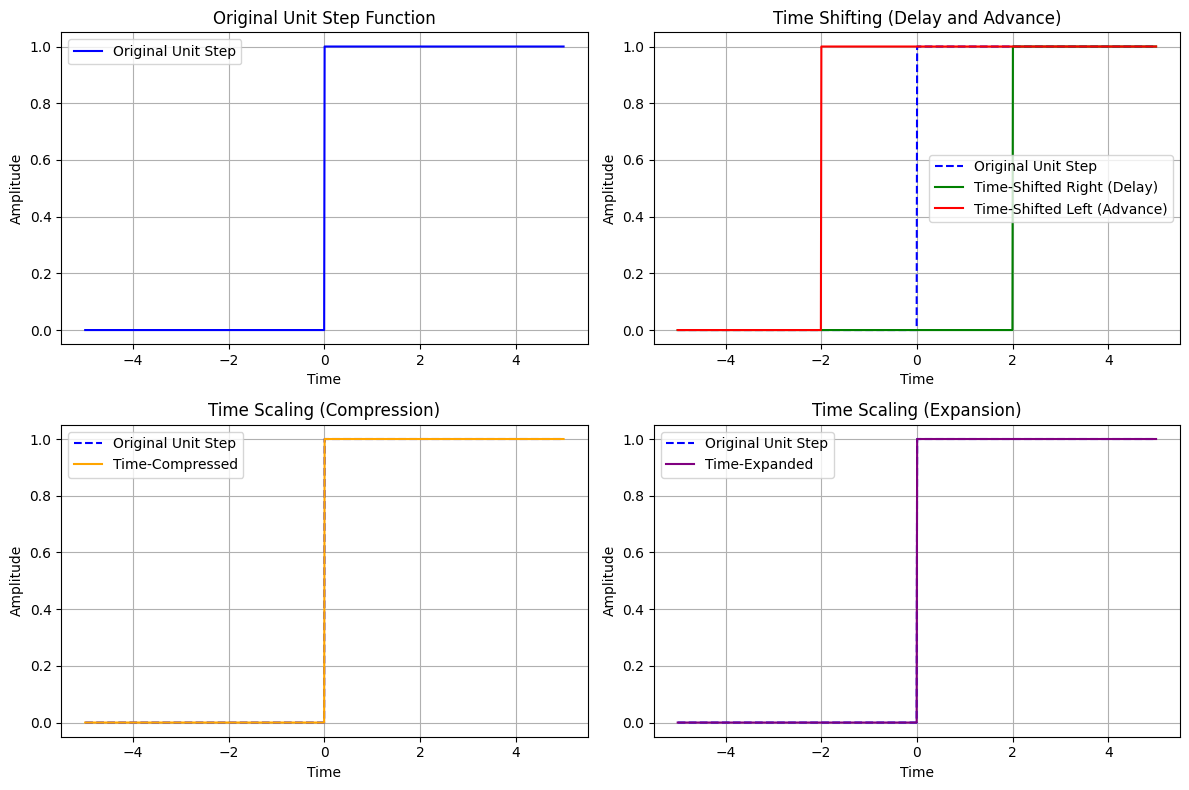

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a unit step function
t = np.linspace(-5, 5, 1000)  # Time axis
unit_step = np.heaviside(t, 1)  # Unit step function

# (b) Perform time shifting (delaying and advancing)
shift = 2  # Time shift (positive for delay, negative for advance)
unit_step_shifted_right = np.heaviside(t - shift, 1)  # Delayed step
unit_step_shifted_left = np.heaviside(t + shift, 1)  # Advanced step

# (c) Perform time scaling (compressing and expanding)
scale = 2  # Time scaling factor
unit_step_scaled_compressed = np.heaviside(t * scale, 1)  # Compressed step
unit_step_scaled_expanded = np.heaviside(t / scale, 1)  # Expanded step

# (d) Plot original and transformed signals
plt.figure(figsize=(12, 8))

# Plot original signal
plt.subplot(2, 2, 1)
plt.plot(t, unit_step, label='Original Unit Step', color='blue')
plt.title('Original Unit Step Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot time-shifted signals
plt.subplot(2, 2, 2)
plt.plot(t, unit_step, label='Original Unit Step', color='blue', linestyle='--')
plt.plot(t, unit_step_shifted_right, label='Time-Shifted Right (Delay)', color='green')
plt.plot(t, unit_step_shifted_left, label='Time-Shifted Left (Advance)', color='red')
plt.title('Time Shifting (Delay and Advance)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot time-compressed signal
plt.subplot(2, 2, 3)
plt.plot(t, unit_step, label='Original Unit Step', color='blue', linestyle='--')
plt.plot(t, unit_step_scaled_compressed, label='Time-Compressed', color='orange')
plt.title('Time Scaling (Compression)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot time-expanded signal
plt.subplot(2, 2, 4)
plt.plot(t, unit_step, label='Original Unit Step', color='blue', linestyle='--')
plt.plot(t, unit_step_scaled_expanded, label='Time-Expanded', color='purple')
plt.title('Time Scaling (Expansion)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Display all plots
plt.tight_layout()
plt.show()

5. Write a Python program to perform the following:
*   Generate two sinusoidal signals with different frequencies and amplitudes.
*   Add the signals together and plot the result.
*   Scale one of the signals and observe the effect.


Signal 1 (Amplitude = 1, Frequency = 5 Hz):
Signal 2 (Amplitude = 0.5, Frequency = 10 Hz):


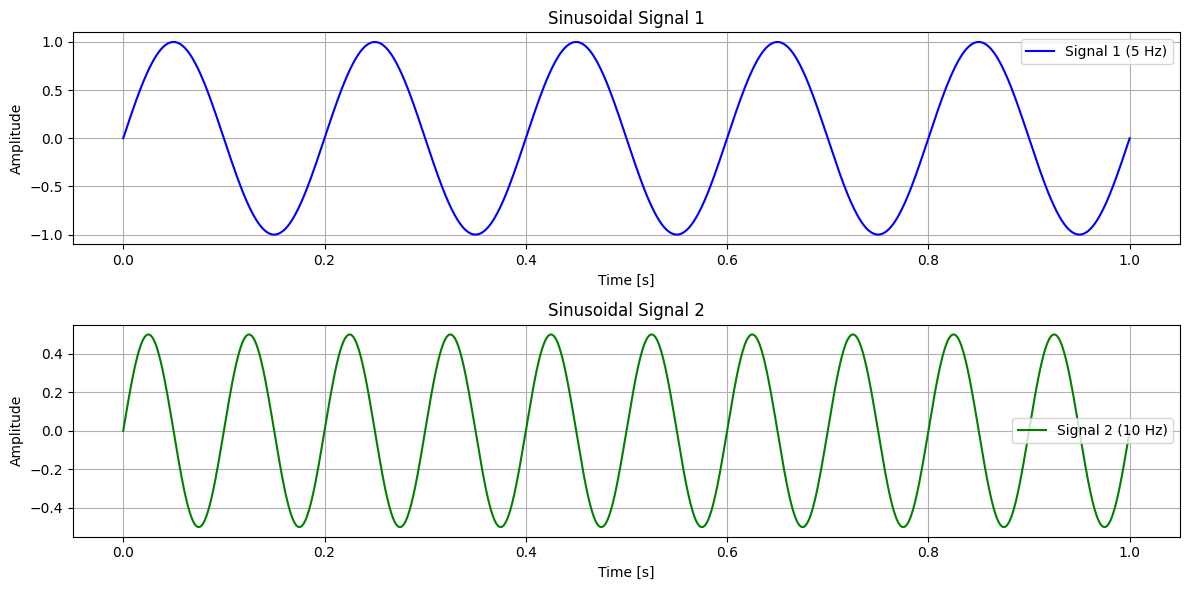

Combined Signal (Signal 1 + Signal 2):


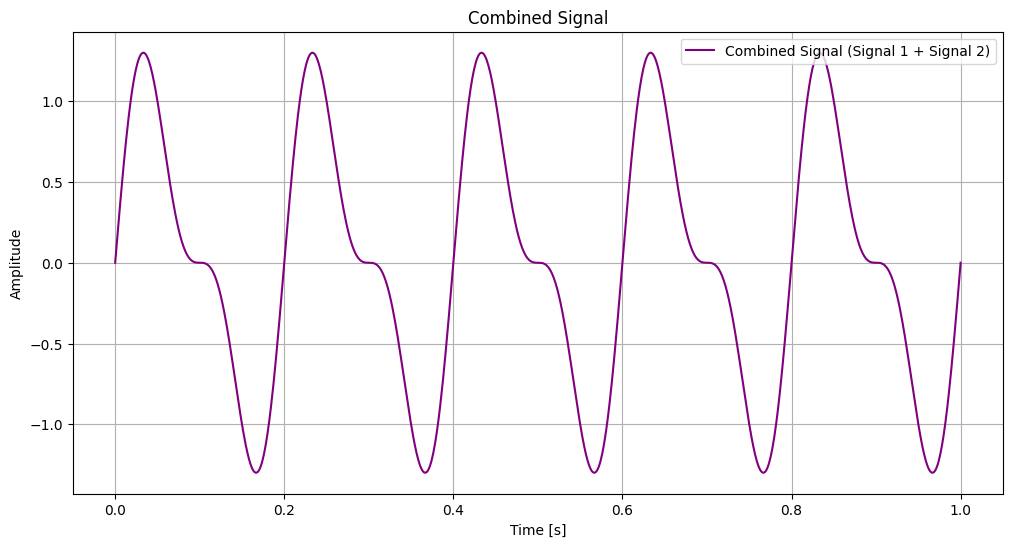

Scaled Signal 1 (Amplitude Scaled by 2):


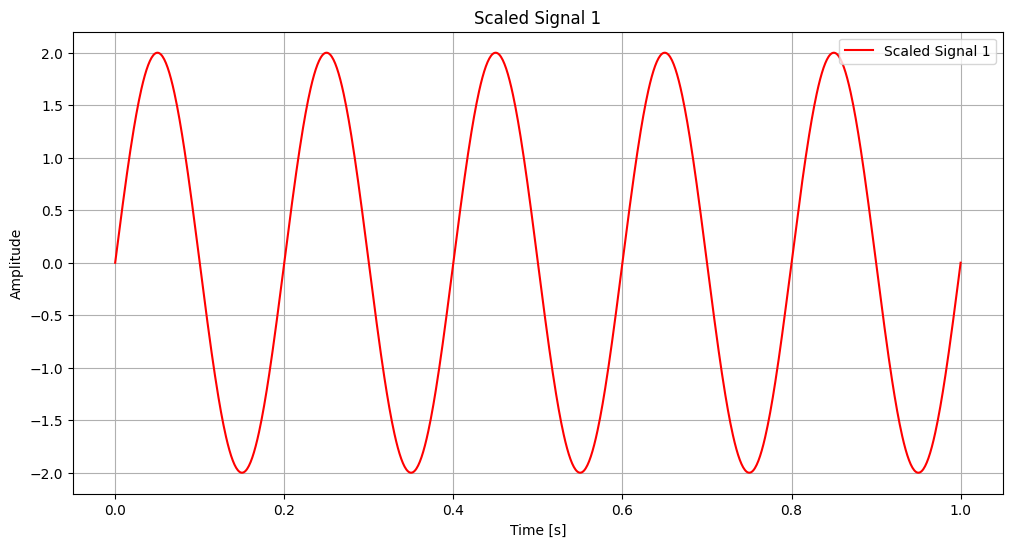

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate two sinusoidal signals with different frequencies and amplitudes
t = np.linspace(0, 1, 1000)  # Time axis for 1 second

# Sinusoidal signal 1
amplitude1 = 1
frequency1 = 5  # Frequency in Hz
signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)

# Sinusoidal signal 2
amplitude2 = 0.5
frequency2 = 10  # Frequency in Hz
signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# Print the two signals separately
print("Signal 1 (Amplitude = 1, Frequency = 5 Hz):")
print("Signal 2 (Amplitude = 0.5, Frequency = 10 Hz):")

# Plot the two individual signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal1, label='Signal 1 (5 Hz)', color='blue')
plt.title('Sinusoidal Signal 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, signal2, label='Signal 2 (10 Hz)', color='green')
plt.title('Sinusoidal Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# (b) Add the signals together and plot the result
combined_signal = signal1 + signal2

print("Combined Signal (Signal 1 + Signal 2):")

# Plot the combined signal
plt.figure(figsize=(12, 6))
plt.plot(t, combined_signal, label='Combined Signal (Signal 1 + Signal 2)', color='purple')
plt.title('Combined Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# (c) Scale one of the signals (Signal 1) and plot the result
scale_factor = 2  # Scaling factor
scaled_signal1 = scale_factor * signal1

print("Scaled Signal 1 (Amplitude Scaled by 2):")

# Plot the scaled signal
plt.figure(figsize=(12, 6))
plt.plot(t, scaled_signal1, label='Scaled Signal 1', color='red')
plt.title('Scaled Signal 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

6.  Write a Python program to perform noise addition and filtering.



*   Generate a clean sinusoidal signal.
*   Add random Gaussian noise to the signal.
*   Apply a low-pass filter and plot the filtered signal.

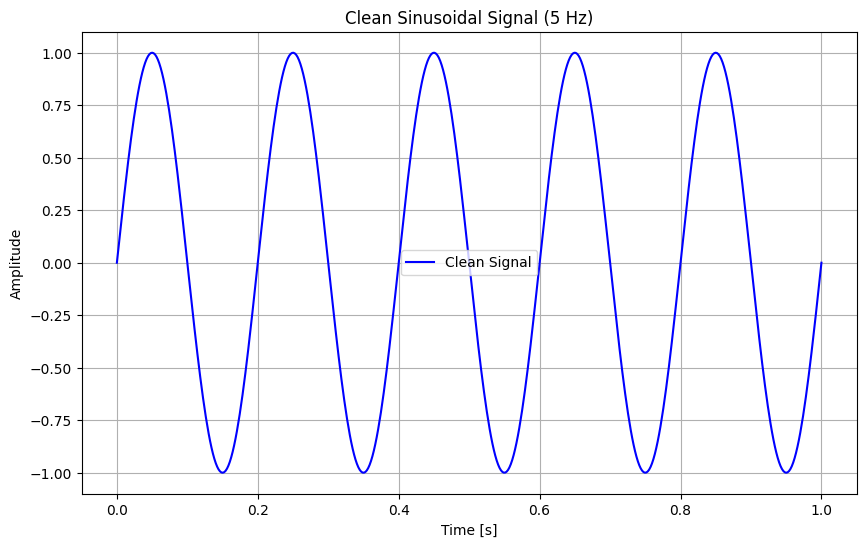

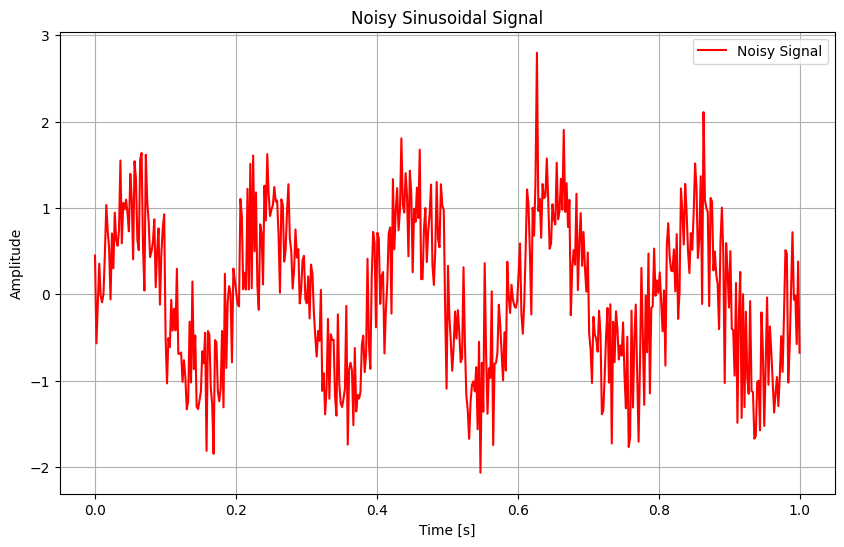

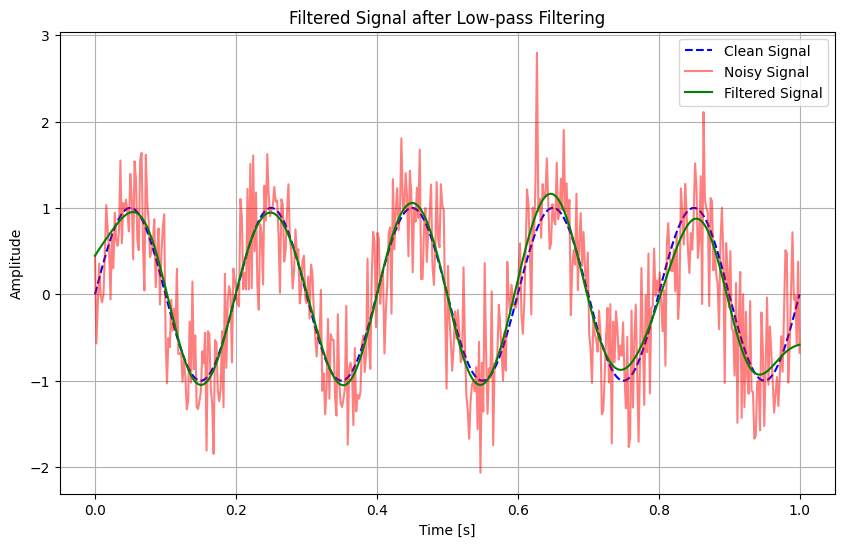

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# (a) Generate a clean sinusoidal signal
fs = 500  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs)  # Time axis for 1 second
frequency = 5  # Frequency of the signal (Hz)
amplitude = 1
clean_signal = amplitude * np.sin(2 * np.pi * frequency * t)

# Plot the clean sinusoidal signal
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal', color='blue')
plt.title('Clean Sinusoidal Signal (5 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# (b) Add random Gaussian noise to the signal
noise = np.random.normal(0, 0.5, clean_signal.shape)  # Gaussian noise with mean=0 and std=0.5
noisy_signal = clean_signal + noise

# Plot the noisy signal
plt.figure(figsize=(10, 6))
plt.plot(t, noisy_signal, label='Noisy Signal', color='red')
plt.title('Noisy Sinusoidal Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# (c) Apply a low-pass filter
# Define a butterworth low-pass filter
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the low-pass filter using filtfilt (zero-phase filtering)
def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

cutoff_frequency = 10  # Cutoff frequency for the low-pass filter (Hz)
filtered_signal = apply_lowpass_filter(noisy_signal, cutoff_frequency, fs)

# Plot the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(t, clean_signal, label='Clean Signal', color='blue', linestyle='--')
plt.plot(t, noisy_signal, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(t, filtered_signal, label='Filtered Signal', color='green')
plt.title('Filtered Signal after Low-pass Filtering')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

7. Write a Python code to perform the following:



* Generate a composite signal made up of two sinusoids of different fre-
quencies.
* Perform the Fast Fourier Transform (FFT) and plot the frequency spec-
trum.


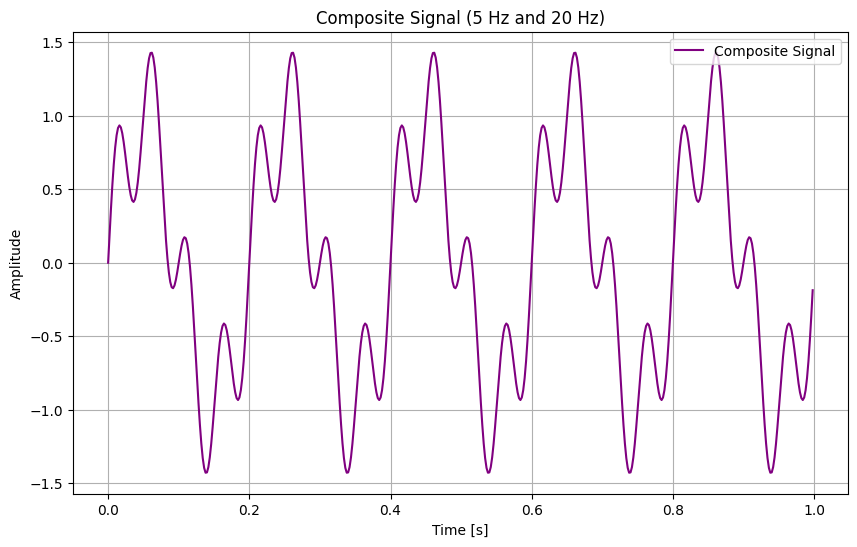

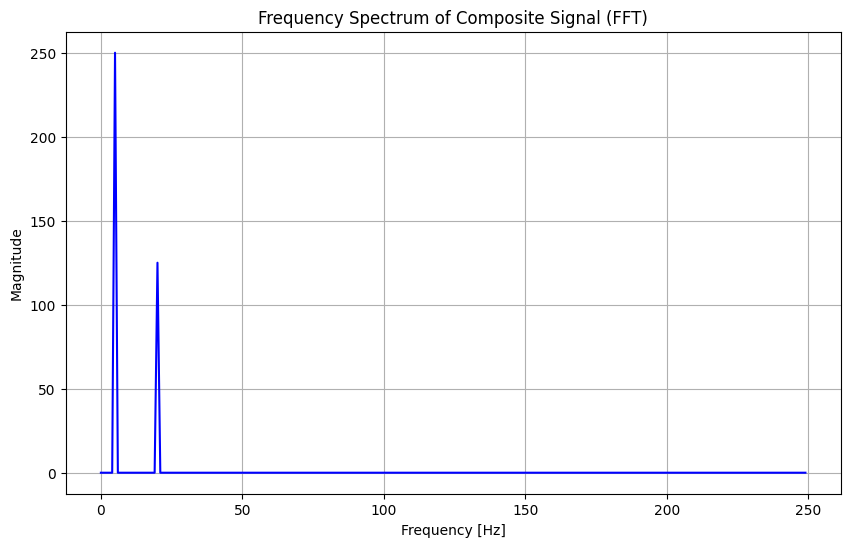

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Generate a composite signal made up of two sinusoids of different frequencies

fs = 500  # Sampling frequency (samples per second)
t = np.linspace(0, 1, fs, endpoint=False)  # Time axis for 1 second

# Sinusoidal signal 1: Frequency = 5 Hz, Amplitude = 1
frequency1 = 5
amplitude1 = 1
signal1 = amplitude1 * np.sin(2 * np.pi * frequency1 * t)

# Sinusoidal signal 2: Frequency = 20 Hz, Amplitude = 0.5
frequency2 = 20
amplitude2 = 0.5
signal2 = amplitude2 * np.sin(2 * np.pi * frequency2 * t)

# Composite signal: Sum of the two sinusoids
composite_signal = signal1 + signal2

# Plot the composite signal
plt.figure(figsize=(10, 6))
plt.plot(t, composite_signal, label='Composite Signal', color='purple')
plt.title('Composite Signal (5 Hz and 20 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# (b) Perform the Fast Fourier Transform (FFT) and plot the frequency spectrum

# Perform FFT
fft_values = np.fft.fft(composite_signal)
fft_freq = np.fft.fftfreq(len(composite_signal), 1/fs)

# Only take the positive frequencies (since FFT is symmetric)
positive_freqs = fft_freq[:len(fft_freq)//2]
positive_magnitude = np.abs(fft_values[:len(fft_values)//2])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_magnitude, color='blue')
plt.title('Frequency Spectrum of Composite Signal (FFT)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


8. Write a Python code to generate a square wave of a given frequency and duty
cycle. Plot the square wave and observe its shape.

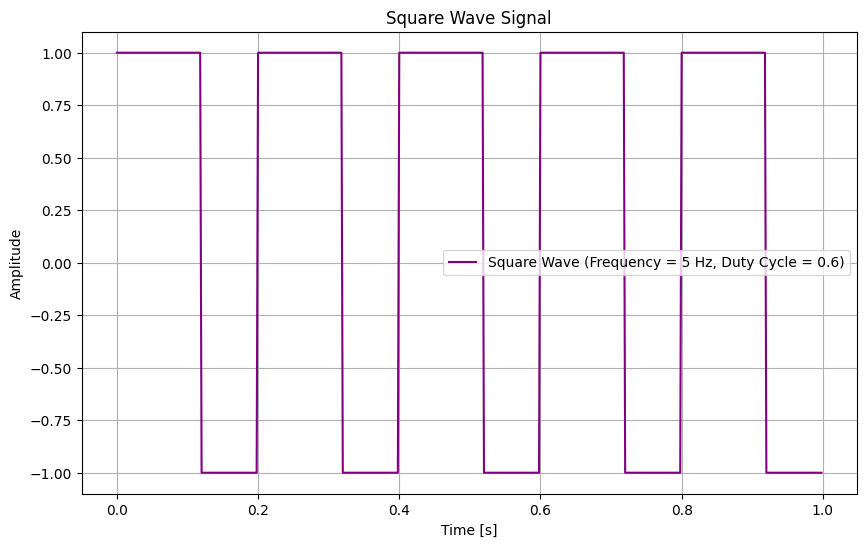

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
frequency = 5  # Frequency of the square wave in Hz
duty_cycle = 0.6  # Duty cycle (ratio of the signal being high)
duration = 1  # Duration of the signal in seconds
fs = 500  # Sampling frequency (samples per second)

# Time axis
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate square wave
square_wave = signal.square(2 * np.pi * frequency * t, duty=duty_cycle)

# Plot the square wave
plt.figure(figsize=(10, 6))
plt.plot(t, square_wave, label=f'Square Wave (Frequency = {frequency} Hz, Duty Cycle = {duty_cycle})', color='purple')
plt.title('Square Wave Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

9. Write a Python program to do the following:



*   Generate a simple discrete-time signal (e.g., a unit step or impulse).
*   Apply the Z-transform to the signal and plot its Z-domain representation.
*   Discuss the poles and zeros of the Z-transform.

<ipython-input-17-342310e43c80>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, unit_step, basefmt=" ", use_line_collection=True)


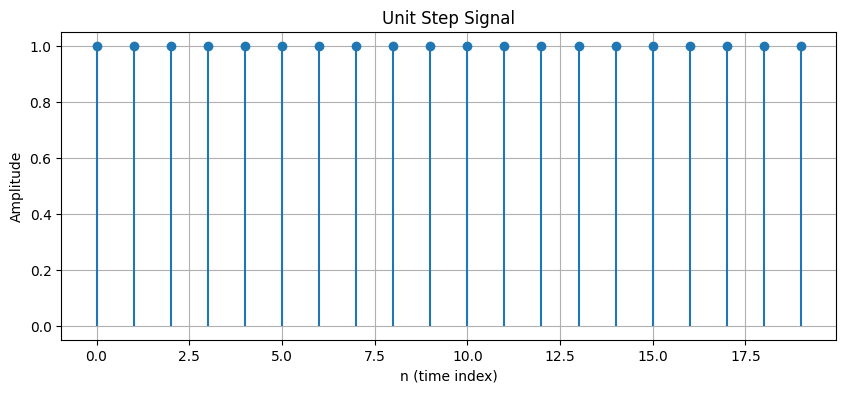

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:481: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:481: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


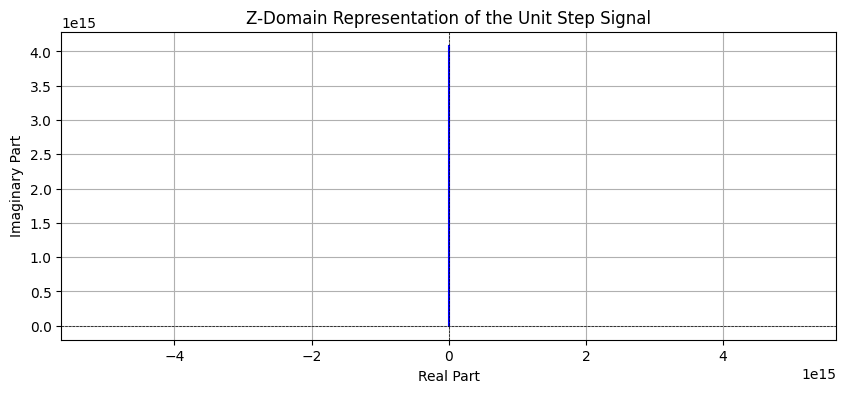

Zeros: []
Poles: [1.]

Discussion on Poles and Zeros:
The zeros of the Z-transform are: []
The poles of the Z-transform are: [1.]
The system is: Unstable


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, freqz

# (a) Generate a simple discrete-time signal (unit step signal)
n = np.arange(0, 20)  # Discrete time vector
unit_step = np.heaviside(n, 1)  # Unit step function

# Plot the unit step signal
plt.figure(figsize=(10, 4))
plt.stem(n, unit_step, basefmt=" ", use_line_collection=True)
plt.title("Unit Step Signal")
plt.xlabel("n (time index)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# (b) Apply the Z-transform to the signal
# For a unit step signal, the Z-transform is 1 / (1 - z^(-1))
num = [1]  # Numerator coefficients (1)
den = [1, -1]  # Denominator coefficients (1 - z^(-1))

# Get frequency response for Z-transform
w = np.linspace(0, 2 * np.pi, 100)  # Frequency vector
w, H_z = freqz(num, den, worN=w)  # Frequency response

# Plot the Z-domain representation
plt.figure(figsize=(10, 4))
plt.plot(np.real(H_z), np.imag(H_z), 'b-')
plt.title("Z-Domain Representation of the Unit Step Signal")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.axis('equal')
plt.show()

# (c) Discuss the poles and zeros of the Z-transform
zeros = np.roots(num)  # Zeros of the transfer function
poles = np.roots(den)  # Poles of the transfer function

# Print zeros and poles
print(f"Zeros: {zeros}")
print(f"Poles: {poles}")

# Poles and Zeros Discussion
stability = "Stable" if np.all(np.abs(poles) < 1) else "Unstable"

print("\nDiscussion on Poles and Zeros:")
print(f"The zeros of the Z-transform are: {zeros}")
print(f"The poles of the Z-transform are: {poles}")
print(f"The system is: {stability}")

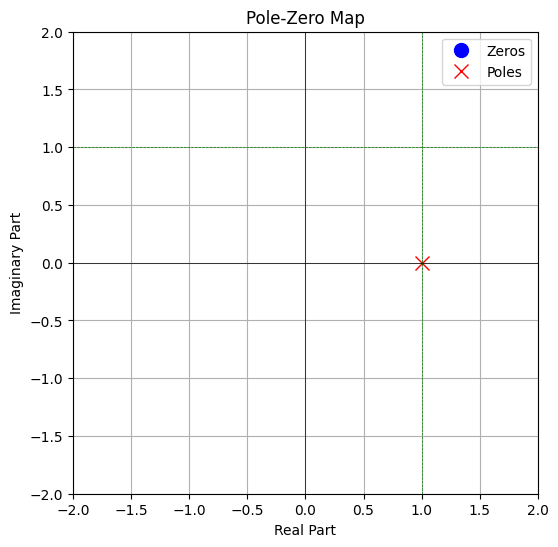

In [18]:
# Plot pole-zero map
plt.figure(figsize=(6, 6))
plt.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=10, label='Zeros')
plt.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Poles')
plt.title("Pole-Zero Map")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(1, color='green', lw=0.5, ls='--')  # Reference line for stability
plt.axhline(1, color='green', lw=0.5, ls='--')  # Reference line for stability
plt.grid()
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.legend()
plt.show()
